# Projet Regression Lin√©aire

Donn√©e prise sur : https://carlabelling.ademe.fr/

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

## Exploration et Pr√©traitement des donn√©es

### Compr√©hension de la Structure

In [141]:
df = pd.read_csv('vehicules-commercialises.csv', sep=';')
df.head()

Marque               Mod√®le dossier            Mod√®le commercial  \
0  CITROEN                   C1 5P 1.0i                   C1 5P 1.0i   
1   TOYOTA            AYGO 3P 1.0 VVT-i            AYGO 3P 1.0 VVT-i   
2   TOYOTA  AYGO 3P 1.0 VVT-i MultiMode  AYGO 3P 1.0 VVT-i MultiMode   
3    SMART      SMART FORTWO 1.0L  BVM5      SMART FORTWO 1.0L  BVM5   
4    SMART      SMART FORFOUR 1.3L BVA6      SMART FORFOUR 1.3L BVA6   

       D√©signation commerciale          CNIT Type Variante Version (TVV)  \
0                   C1 5P 1.0i  MCT1012TR301                MCT1012TR301   
1            AYGO 3P 1.0 VVT-i  MJT1071V7879                MJT1071V7879   
2  AYGO 3P 1.0 VVT-i MultiMode  MJT3071VP115                MJT3071VP115   
3      SMART FORTWO 1.0L  BVM5  MST1001DY331                MST1001DY331   
4      SMART FORFOUR 1.3L BVA6  MST3204C1278                MST3204C1278   

  Carburant Hybride  Puissance administrative  Puissance maximale  ...  HC  \
0   Essence     NaN                       4.0                50.0  ... NaN   
1   Essence     NaN                       4.0                50.0  ... NaN   
2   Essence     NaN                       4.0                50.0  ... NaN   
3   Essence     NaN                       4.0                45.0  ... NaN   
4   Essence     NaN                       5.0                70.0  ... NaN   

   NOx  HC+NOx  Particules  Masse vide euro min  Masse vide euro max  \
0  NaN     NaN         NaN                  NaN                  NaN   
1  NaN     NaN         NaN                  NaN                  NaN   
2  NaN     NaN         NaN                  NaN                  NaN   
3  NaN     NaN         NaN                  NaN                  NaN   
4  NaN     NaN         NaN                  NaN                  NaN   

   Champ v9  Ann√©e  Carrosserie  Gamme  
0       NaN   2008          NaN    NaN  
1       NaN   2008          NaN    NaN  
2       NaN   2008          NaN    NaN  
3       NaN   2008          NaN    NaN  
4       NaN   2008          NaN    NaN  

[5 rows x 26 columns]

In [142]:
print('Dimension de la dataframe :', df.shape, '\n')
df.info()

Dimension de la dataframe : (305701, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305701 entries, 0 to 305700
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Marque                       305701 non-null  object 
 1   Mod√®le dossier               305701 non-null  object 
 2   Mod√®le commercial            305701 non-null  object 
 3   D√©signation commerciale      305701 non-null  object 
 4   CNIT                         305689 non-null  object 
 5   Type Variante Version (TVV)  260893 non-null  object 
 6   Carburant                    305701 non-null  object 
 7   Hybride                      159780 non-null  object 
 8   Puissance administrative     301497 non-null  float64
 9   Puissance maximale           301428 non-null  float64
 10  Bo√Æte de vitesse             301538 non-null  object 
 11  Consommation urbaine         301223 non-null  float64
 12  Consommatio

### Nettoyage des donn√©es

In [143]:
df.isnull().sum()

Marque                              0
Mod√®le dossier                      0
Mod√®le commercial                   0
D√©signation commerciale             0
CNIT                               12
Type Variante Version (TVV)     44808
Carburant                           0
Hybride                        145921
Puissance administrative         4204
Puissance maximale               4273
Bo√Æte de vitesse                 4163
Consommation urbaine             4478
Consommation extra-urbaine       4478
Consommation mixte               4398
CO2                              4398
CO type I                      146611
HC                             268888
NOx                            146611
HC+NOx                         183249
Particules                     155458
Masse vide euro min            145831
Masse vide euro max            145831
Champ v9                       108278
Ann√©e                               0
Carrosserie                    166801
Gamme                          166801
dtype: 

On va ici enlever commencer par supprimer les colonnes CO type I / HC / NOx / HC+NOx / Particules car ce sont des √©missions li√©es mais diff√©rentes du CO‚ÇÇ, puis les colonnes CNIT / TVV / D√©signation commerciale / Marque / Mod√®le car ce sont des identifiants ou cat√©gories trop sp√©cifiques.

In [144]:
drops = ('CO type I', 'HC', 'NOx', 'HC+NOx', 'Champ v9', 'Particules', 'CNIT', 'Type Variante Version (TVV)', 'D√©signation commerciale', 'Marque', 'Mod√®le dossier', 'Mod√®le commercial', 'Gamme', 'Carrosserie')
for drop in drops:
    df = df.drop(drop, axis = 1)

df.isnull().sum()

Carburant                          0
Hybride                       145921
Puissance administrative        4204
Puissance maximale              4273
Bo√Æte de vitesse                4163
Consommation urbaine            4478
Consommation extra-urbaine      4478
Consommation mixte              4398
CO2                             4398
Masse vide euro min           145831
Masse vide euro max           145831
Ann√©e                              0
dtype: int64

C:\Users\matys\AppData\Local\Temp\ipykernel_17900\470227958.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_counts = df.groupby("Ann√©e").apply(lambda x: x.isna().sum())


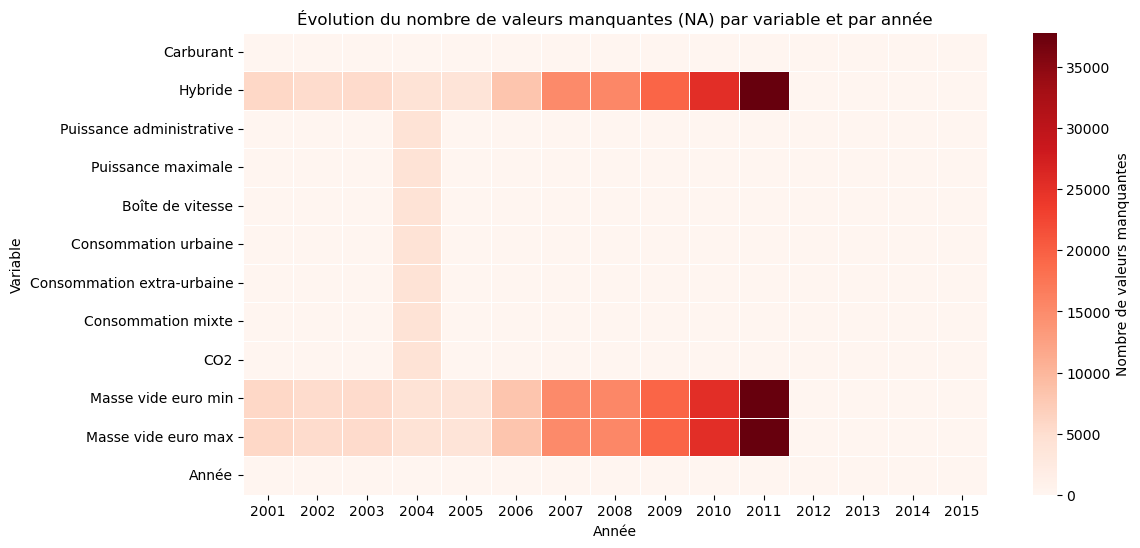

In [145]:
# V√©rifier que 'Ann√©e' est bien une colonne num√©rique
df['Ann√©e'] = pd.to_numeric(df['Ann√©e'], errors='coerce')

# Calculer le nombre de valeurs manquantes par ann√©e et par variable
na_counts = df.groupby("Ann√©e").apply(lambda x: x.isna().sum())

# Cr√©ation du graphique
plt.figure(figsize=(12, 6))
sns.heatmap(na_counts.T, cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Nombre de valeurs manquantes'})

plt.xlabel("Ann√©e")
plt.ylabel("Variable")
plt.title("√âvolution du nombre de valeurs manquantes (NA) par variable et par ann√©e")
plt.show()

Ici on peut voir une similitude sur les donn√©es manquantes qui ont l'air d'√™tre sur toute les m√™me ligne on devrai donc perdre peu de donn√©e en les supprimant

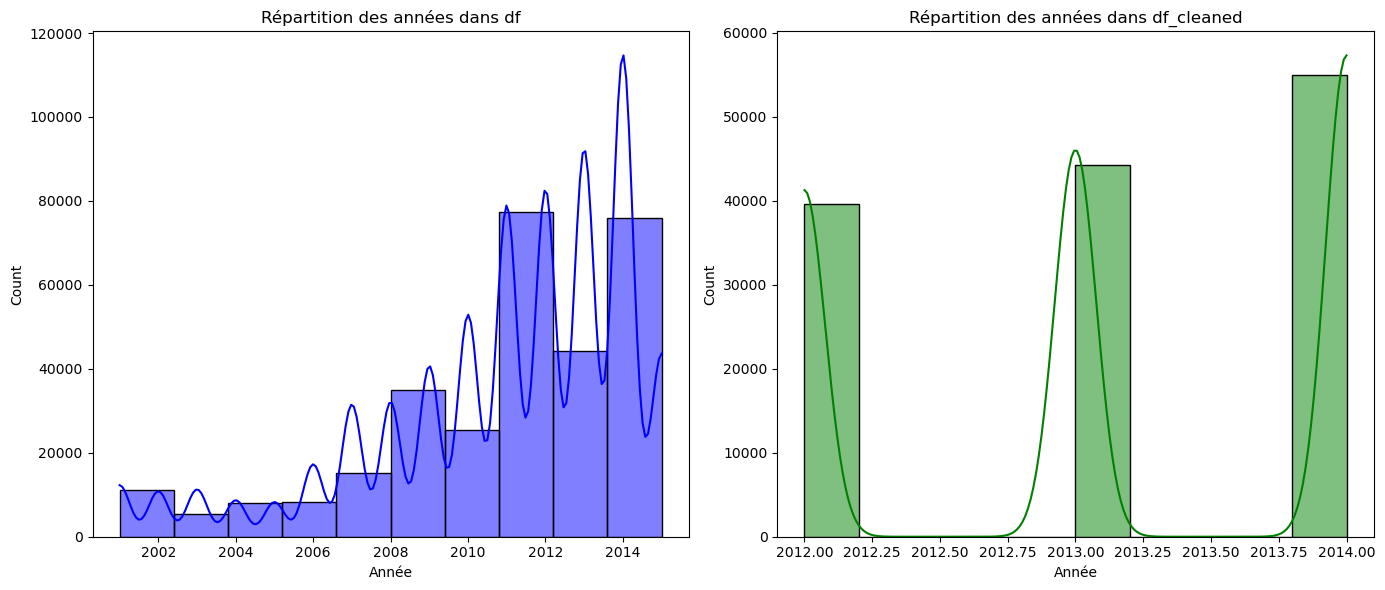

In [146]:
# Cr√©ation des graphiques
plt.figure(figsize=(14, 6))

# Premier graphique pour df
plt.subplot(1, 2, 1)
sns.histplot(df['Ann√©e'], kde=True, color='blue', bins=10)
plt.title('R√©partition des ann√©es dans df')

# Deuxi√®me graphique pour df_cleaned
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Ann√©e'], kde=True, color='green', bins=10)
plt.title('R√©partition des ann√©es dans df_cleaned')

# Afficher les graphiques
plt.tight_layout()
plt.show()

On voit qu'en faisant cela on ne tombe plus que sur des voitures de 2012 2013 et 2014 il va donc falloir trouver une autre solution pour perdre le moins d'information possible

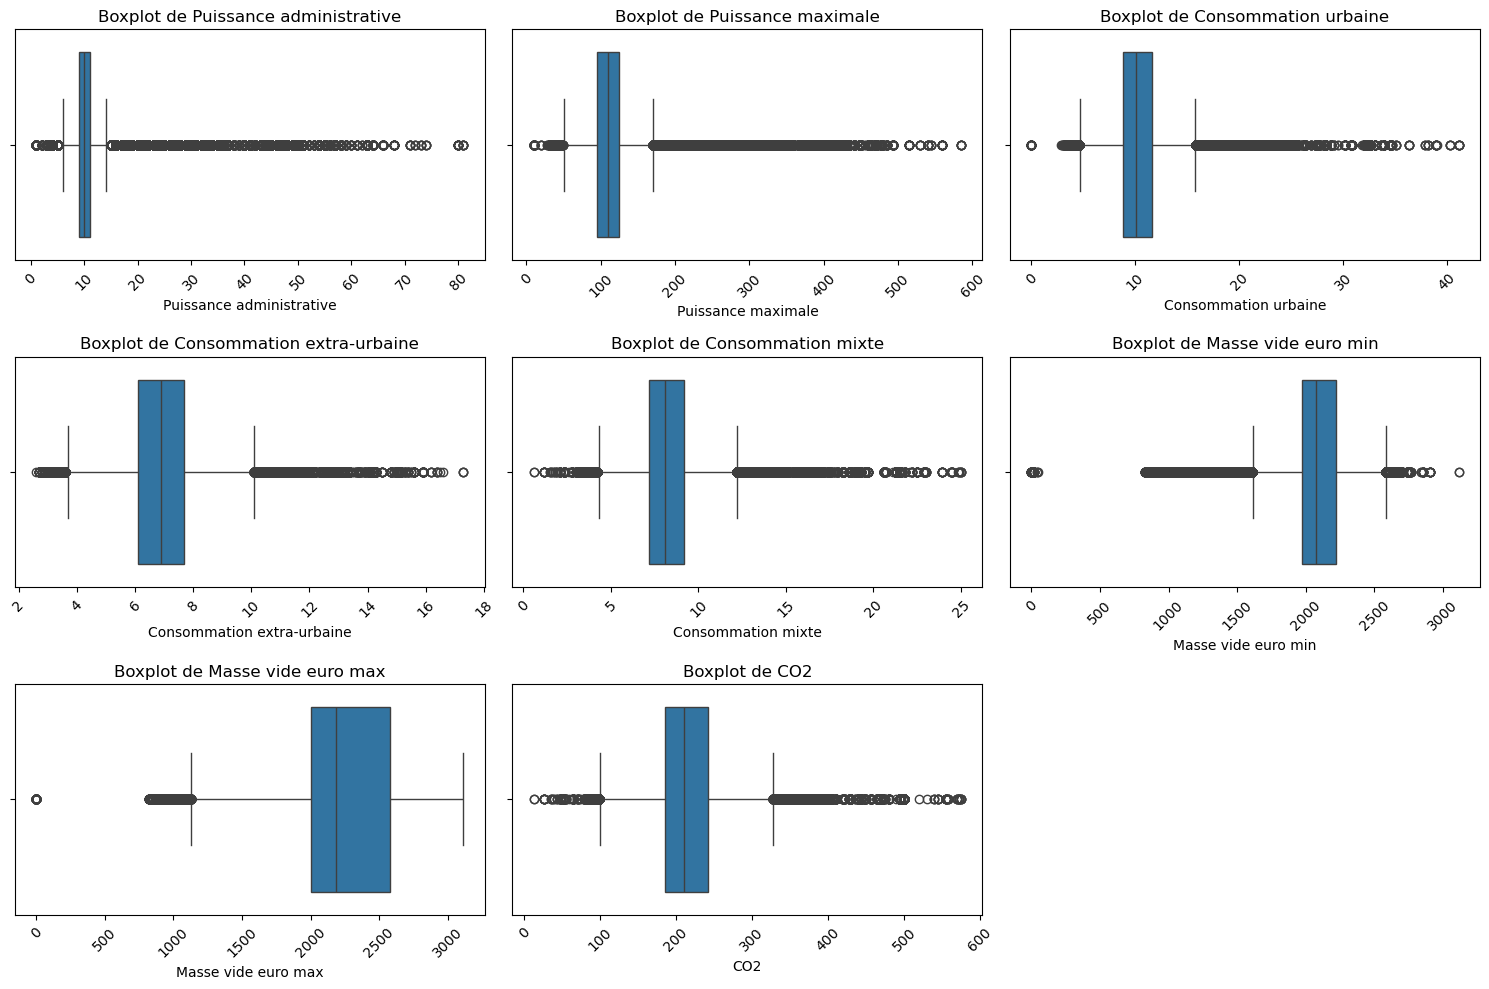

In [147]:
# S√©lectionner les variables num√©riques pour les boxplots
numerical_cols = [
    "Puissance administrative", "Puissance maximale", "Consommation urbaine", 
    "Consommation extra-urbaine", "Consommation mixte", "Masse vide euro min", 
    "Masse vide euro max", "CO2"
]

# Initialiser la figure pour les boxplots
plt.figure(figsize=(15, 10))

# Cr√©er un boxplot pour chaque variable num√©rique
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Disposition en 3x3
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.xticks(rotation=45)

# Afficher les boxplots
plt.tight_layout()
plt.show()

On peut voir beaucoup de valeur extr√®me pour chacune des variables on va donc pr√©f√©r√© utiliser la m√©diane pour les valeurs manquantes

In [148]:
# Cr√©er un imputer pour remplir les valeurs manquantes avec la m√©diane
imputer_num = SimpleImputer(strategy='median')  # Remplir avec la m√©diane

# Appliquer l'imputation aux colonnes num√©riques
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# V√©rifier les valeurs manquantes apr√®s imputation
print(df.isnull().sum())  # Devrait montrer 0 pour toutes les colonnes num√©riques

Carburant                          0
Hybride                       145921
Puissance administrative           0
Puissance maximale                 0
Bo√Æte de vitesse                4163
Consommation urbaine               0
Consommation extra-urbaine         0
Consommation mixte                 0
CO2                                0
Masse vide euro min                0
Masse vide euro max                0
Ann√©e                              0
dtype: int64


In [149]:
categorical_cols = ["Bo√Æte de vitesse", "Hybride"]
df[categorical_cols] = df[categorical_cols].fillna("Autre")
print(df.isnull().sum())

Carburant                     0
Hybride                       0
Puissance administrative      0
Puissance maximale            0
Bo√Æte de vitesse              0
Consommation urbaine          0
Consommation extra-urbaine    0
Consommation mixte            0
CO2                           0
Masse vide euro min           0
Masse vide euro max           0
Ann√©e                         0
dtype: int64


### Analyse exploratoire des donn√©es

In [ ]:
# Statistiques descriptives 

print("Statistiques descriptives :")
print(df.describe())

üìä Statistiques descriptives :
       Puissance administrative  Puissance maximale  Consommation urbaine  \
count             305701.000000       305701.000000         305701.000000   
mean                  11.192433          122.163669             10.521886   
std                    6.507268           56.323398              3.235754   
min                    1.000000           10.000000              0.000000   
25%                    9.000000           95.000000              8.800000   
50%                   10.000000          110.000000             10.100000   
75%                   11.000000          125.000000             11.600000   
max                   81.000000          585.000000             41.100000   

       Consommation extra-urbaine  Consommation mixte            CO2  \
count               305701.000000       305701.000000  305701.000000   
mean                     6.884793            8.213086     210.561071   
std                      1.573978            2.137985    

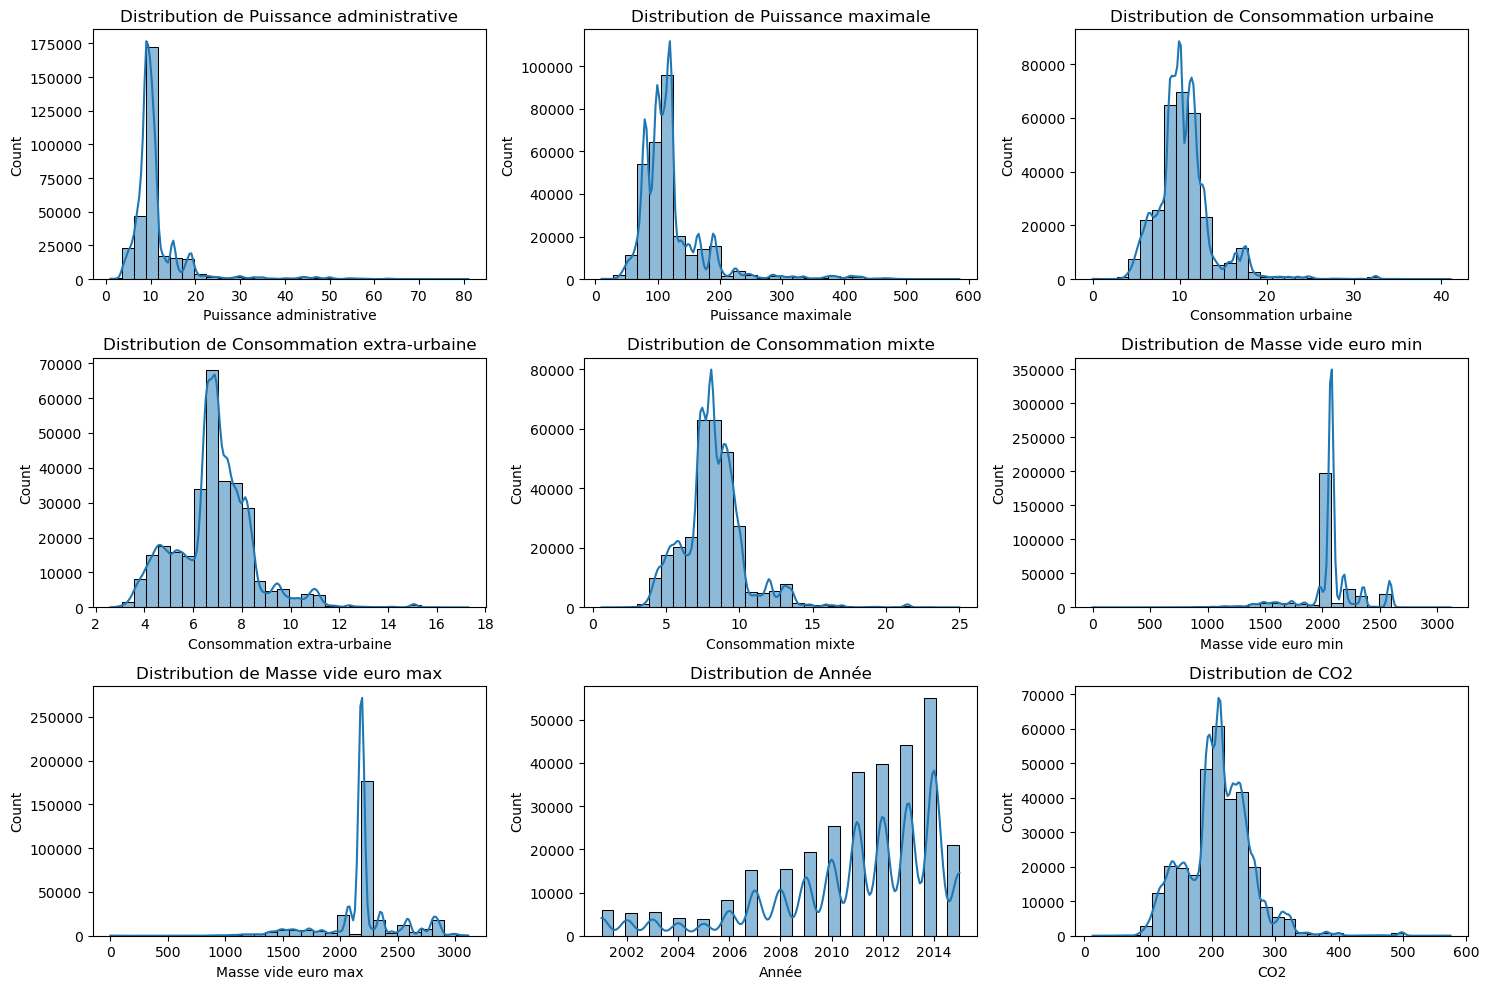

In [151]:
# Histogrammes des variables num√©riques

numerical_cols = [
    "Puissance administrative", "Puissance maximale", "Consommation urbaine", 
    "Consommation extra-urbaine", "Consommation mixte", "Masse vide euro min", 
    "Masse vide euro max", "Ann√©e", "CO2"
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

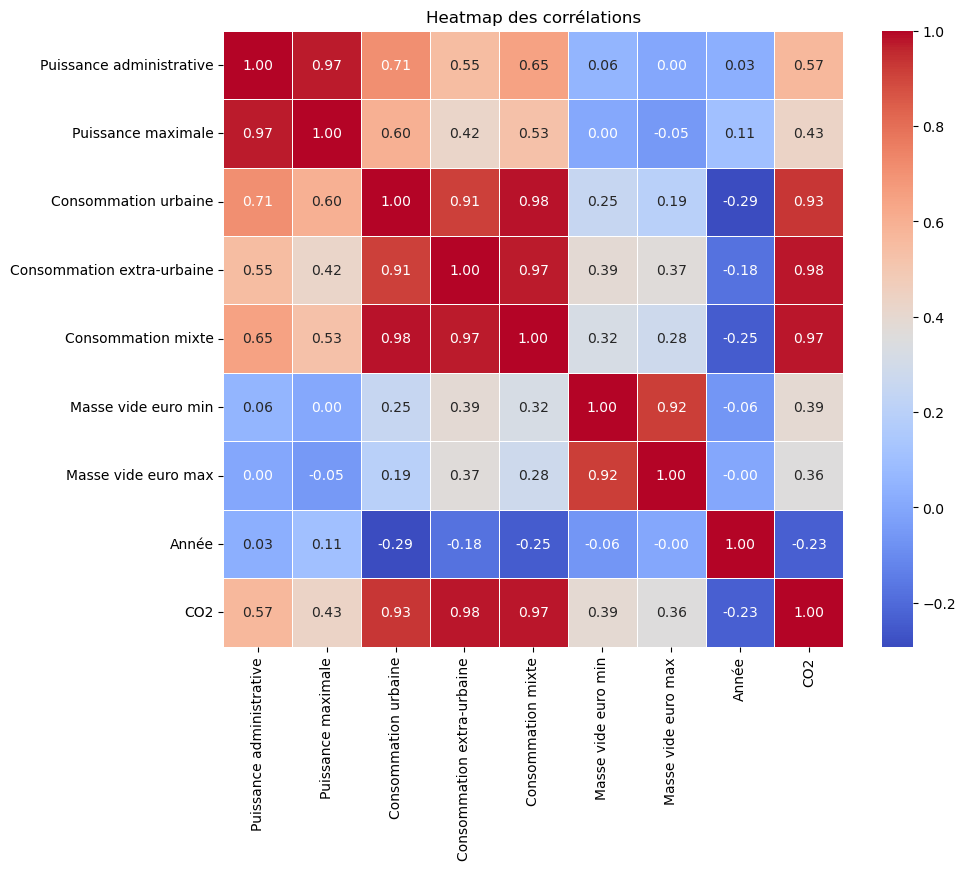

In [138]:
# Matrice de corr√©lation (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap des corr√©lations")
plt.show()

On peut supprimer la consommation urbaine / consommation extra-urbaine car fortement corr√©ler avec consommation mixte de m√™me pourMasse video euro min et max et puissance maximale et puissance administrative 

In [152]:
drops = ('Consommation urbaine', 'Consommation extra-urbaine', 'Puissance maximale', 'Masse vide euro max')
for drop in drops:
    df = df.drop(drop, axis = 1)


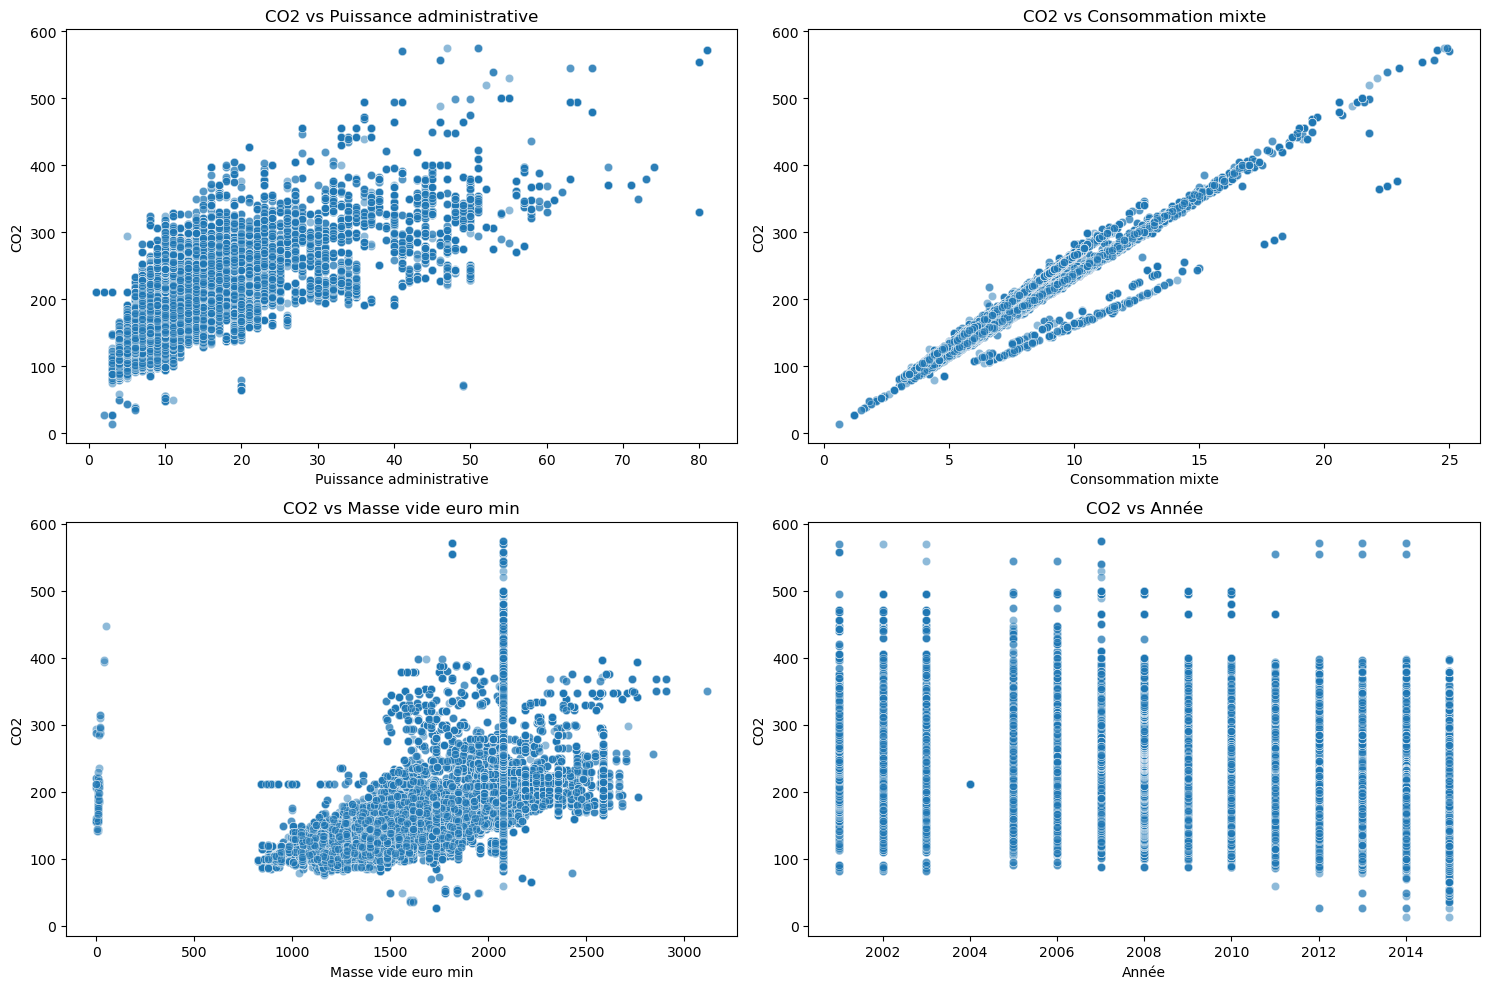

In [154]:
# Scatterplots pour voir la relation entre CO‚ÇÇ et d'autres variables
variables_explicatives = ["Puissance administrative", "Consommation mixte", "Masse vide euro min", "Ann√©e"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_explicatives):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=col, y="CO2", alpha=0.5)
    plt.title(f"CO2 vs {col}")
plt.tight_layout()
plt.show()

## Pr√©paration des donn√©es 

### Encodage des variables cat√©gorielles

In [156]:
import pandas as pd

# One-Hot Encoding pour "Carburant" et "Bo√Æte de vitesse"
df = pd.get_dummies(df, columns=["Carburant", "Bo√Æte de vitesse"], drop_first=True)

# Label Encoding pour "Hybride" 
df["Hybride"] = df["Hybride"].map({"Hybre": 1, "Non hybride": 0, "Autre": 0})  # On met "Autre" √† 0 par d√©faut

# V√©rification du dataframe apr√®s encodage
print(df.head())
print(df.dtypes)  # V√©rifier que les variables cat√©gorielles sont bien num√©riques

   Hybride  Puissance administrative  Consommation mixte    CO2  \
0      0.0                       4.0                 4.6  108.0   
1      0.0                       4.0                 4.6  108.0   
2      0.0                       4.0                 4.6  109.0   
3      0.0                       4.0                 4.7  112.0   
4      0.0                       5.0                 5.6  133.0   

   Masse vide euro min  Ann√©e  Carburant_EE  Carburant_EH  Carburant_EL  \
0               2076.0   2008         False         False         False   
1               2076.0   2008         False         False         False   
2               2076.0   2008         False         False         False   
3               2076.0   2008         False         False         False   
4               2076.0   2008         False         False         False   

   Carburant_EN  ...  Bo√Æte de vitesse_M 7  Bo√Æte de vitesse_M5  \
0         False  ...                 False                False   
1        

### Encodages des donn√©es

Deux options courantes :

1. Standardisation : Centrer les donn√©es (moyenne = 0, √©cart-type = 1) ‚Üí Utile si les donn√©es suivent une distribution normale.
2. Min-Max Scaling : Mettre les valeurs entre 0 et 1 ‚Üí Utile si les donn√©es ont des √©chelles diff√©rentes et doivent √™tre compar√©es.

In [159]:
# S√©lection des colonnes num√©riques √† normaliser
numerical_cols = [
    "Puissance administrative", "Consommation mixte", "Masse vide euro min", "Ann√©e", "CO2"
]

# Appliquer la normalisation Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# V√©rification du r√©sultat
print(df.head())  # Voir un aper√ßu des donn√©es apr√®s normalisation
print(df.describe())  # V√©rifier que toutes les valeurs sont entre 0 et 1

   Hybride  Puissance administrative  Consommation mixte       CO2  \
0      0.0                    0.0375            0.163934  0.169039   
1      0.0                    0.0375            0.163934  0.169039   
2      0.0                    0.0375            0.163934  0.170819   
3      0.0                    0.0375            0.168033  0.176157   
4      0.0                    0.0500            0.204918  0.213523   

   Masse vide euro min  Ann√©e  Carburant_EE  Carburant_EH  Carburant_EL  \
0             0.666453    0.5         False         False         False   
1             0.666453    0.5         False         False         False   
2             0.666453    0.5         False         False         False   
3             0.666453    0.5         False         False         False   
4             0.666453    0.5         False         False         False   

   Carburant_EN  ...  Bo√Æte de vitesse_M 7  Bo√Æte de vitesse_M5  \
0         False  ...                 False                

## V√©rification avant la regression

### Lin√©arit√©

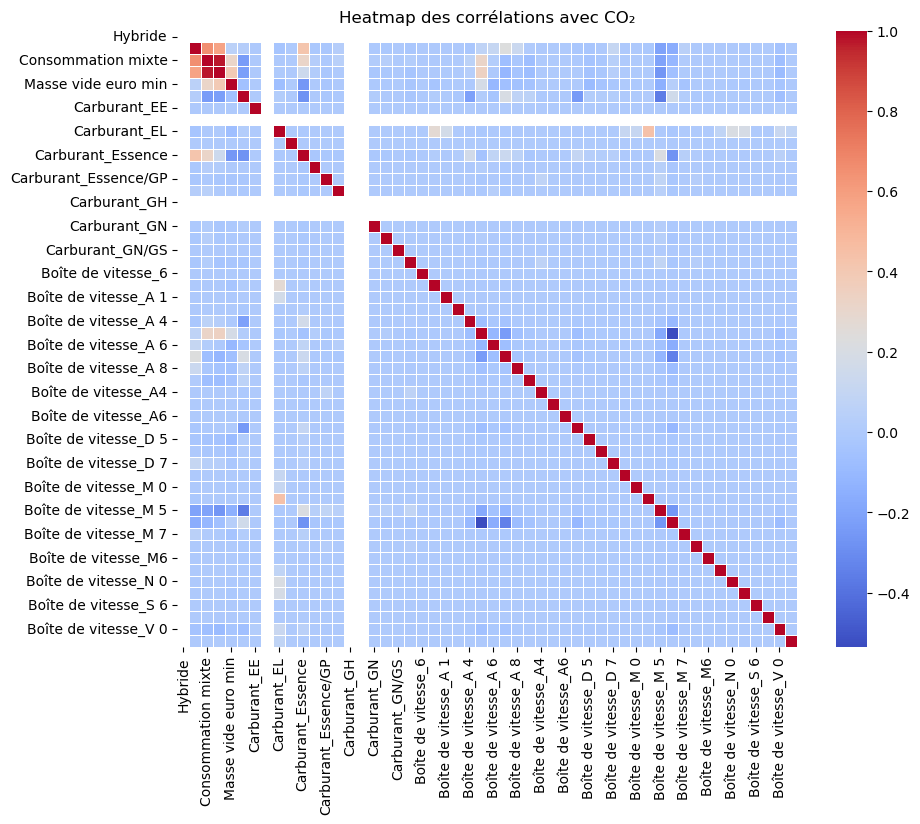

In [182]:
# Heatmap des corr√©lations avec CO2

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des corr√©lations avec CO‚ÇÇ")
plt.show()

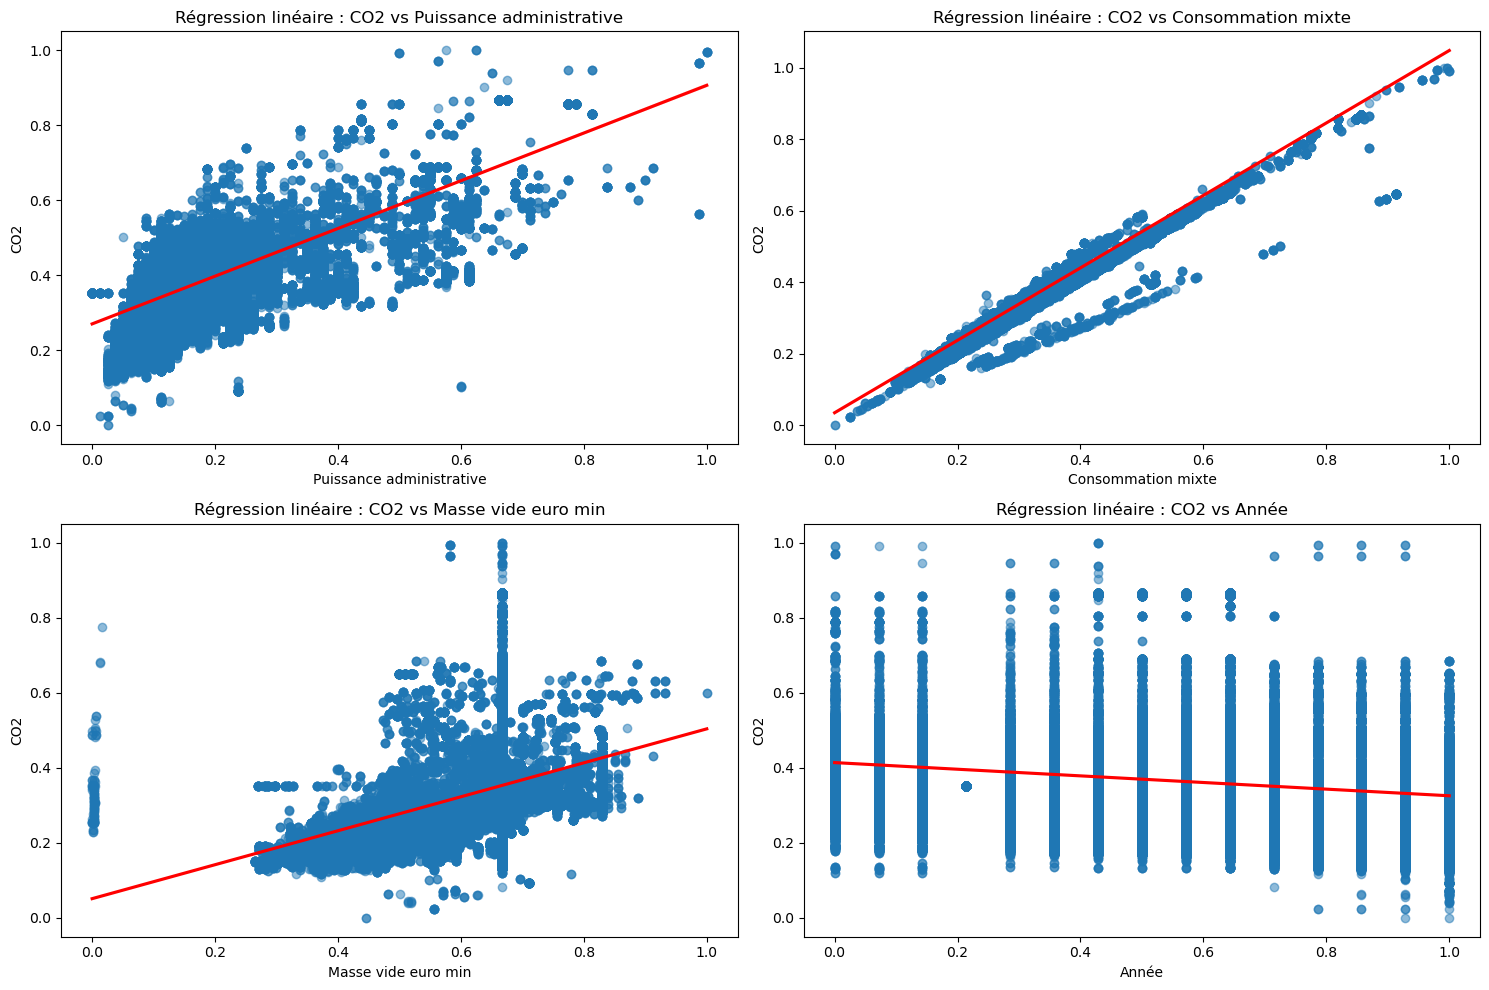

In [165]:
variables_explicatives = ["Puissance administrative", "Consommation mixte", "Masse vide euro min", "Ann√©e"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_explicatives):
    plt.subplot(2, 2, i + 1)
    sns.regplot(data=df, x=col, y="CO2", scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    plt.title(f"R√©gression lin√©aire : CO2 vs {col}")
plt.tight_layout()
plt.show()

## R√©gression Lin√©aire

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('CO2', axis=1)

y = df['CO2']

# Diviser les donn√©es en un jeu d'entra√Ænement et un jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cr√©ation du mod√®le de r√©gression lin√©aire
model = LinearRegression()

# Entra√Ænement du mod√®le
model.fit(X_train, y_train)

# Pr√©dictions sur les donn√©es de test
y_pred = model.predict(X_test)

# √âvaluation du mod√®le
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) : {mse}')

# Calcul du coefficient de d√©termination R¬≤
r2_score = model.score(X_test, y_test)
print(f'Coefficient de d√©termination R¬≤ : {r2_score}')

Mean Squared Error (MSE) : 4.787995738567287e-05
Coefficient de d√©termination R¬≤ : 0.9941024664160162


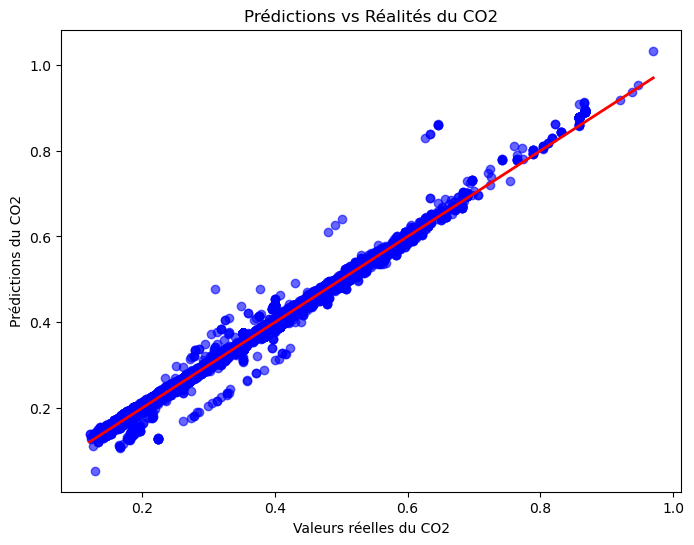

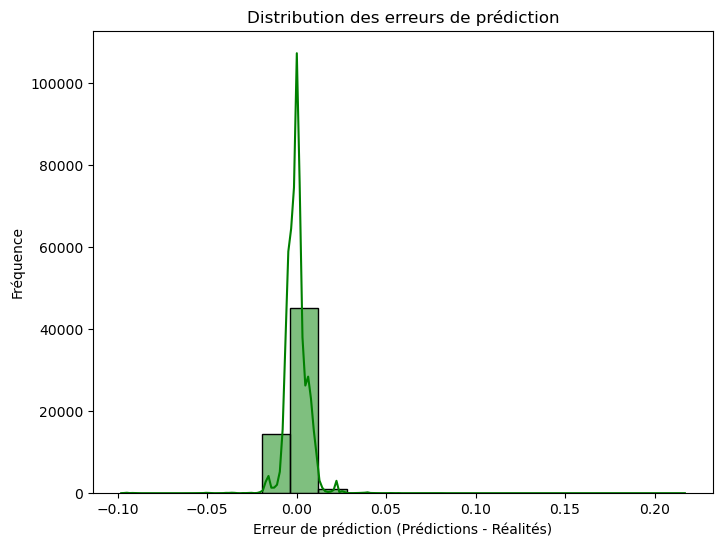

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualisation des pr√©dictions vs valeurs r√©elles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Pr√©dictions vs R√©alit√©s du CO2')
plt.xlabel('Valeurs r√©elles du CO2')
plt.ylabel('Pr√©dictions du CO2')
plt.show()

# Visualisation de l'erreur de pr√©diction
plt.figure(figsize=(8, 6))
errors = y_pred - y_test
sns.histplot(errors, kde=True, color='green', bins=20)
plt.title('Distribution des erreurs de pr√©diction')
plt.xlabel('Erreur de pr√©diction (Pr√©dictions - R√©alit√©s)')
plt.ylabel('Fr√©quence')
plt.show()